# Goal: Find low-income high residential energy households in OK

## Definitions:

### Low-Income Household:

Household whose annual income is below 200% of the 2017 Federal Poverty Guideline:

Person - Income

1 - 12,060.00

Add 4,180.00 for each additional person in household.

12060 * 2 = 24120

4180 * 2 = 8360

https://aspe.hhs.gov/2017-poverty-guidelines

### Residential Energy Expenditures:

The average annual cost of purchased residential energy, including the cost of renewable energy resources.

### Residential Energy Burden:

Residential Energy Expenditures divided by the annual income of that household.

### High Residential Energy Users:

Low-Income Household whose Residential Energy Expenditures exceed the median level of Residential Energy Expenditures for all Low-Income Households in the state.

### High Energy Burden Households:

Low-Income Household whose Residential Energy Burden exceeds the median level of Residential Energy Burden for all Low-Income Households in the state.

https://www.law.cornell.edu/cfr/text/10/440.3

In [1]:
import sys

In [2]:
sys.executable

'C:\\Users\\zcole\\my_projects\\wx_maps\\env-geo\\python.exe'

In [3]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
h40 = pd.read_csv("C://Users/zcole/my_projects/wx_maps/inputs/csv_hok_13-17/psam_h40.csv")

h40.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95829 entries, 0 to 95828
Columns: 233 entries, RT to WGTP80
dtypes: float64(141), int64(91), object(1)
memory usage: 170.4+ MB


In [5]:
pma = gpd.read_file("C://Users/zcole/my_projects/wx_maps/inputs/tl_2017_40_puma10/tl_2017_40_puma10.shp")

pma.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
STATEFP10     28 non-null object
PUMACE10      28 non-null object
GEOID10       28 non-null object
NAMELSAD10    28 non-null object
MTFCC10       28 non-null object
FUNCSTAT10    28 non-null object
ALAND10       28 non-null int64
AWATER10      28 non-null int64
INTPTLAT10    28 non-null object
INTPTLON10    28 non-null object
geometry      28 non-null geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 2.5+ KB


### PUMS Data Definitions

ADJHSG - Adjustment factor for housing dollar amounts (6 implied decimal places)

ADJINC - Adjustment factor for income and earnings dollar amounts (6 implied decimal places)

ELEP - Electricity (monthly cost, use ADJHSG to adjust values 3 and over to constant dollars)

FULP - Fuel cost (yearly cost for fuels other than gas and electricity, use ADJHSG to adjust values 3 and over to constant dollars)

GASP - Gas (monthly cost, use ADJHSG to adjust GASP values 4 and over to constant dollars)

HINCP - Household income (past 12 months, use ADJINC to adjust HINCP to constant dollars)

NP - Number of persons associated with this housing record

R60 - Presence of persons 60 years and over in household (unweighted)

##### ELEP & FULP VALS

1 = included in rent or in condo fee

2 = no charge/not used

3+ = rounded and top-coded dollar amounts

##### GASP VALS

1 = included in rent or in condo fee

2 = included in electricity payment

3 = no charge/not used

4+ = rounded and top-coded dollar amounts

##### NP VALS

0 = Vacant unit

1 = One person record (one person in household or any person in group quarters)

2+ = Number of person records (number of persons in household)

In [6]:
h40['ele'] = h40.ADJHSG / 1000000 * h40.ELEP[(h40.ELEP >= 3)]
h40['gas'] = h40.ADJHSG / 1000000 * h40.GASP[(h40.GASP >= 4)]
h40['ful'] = h40.ADJHSG / 1000000 * h40.FULP[(h40.FULP >= 3)] / 12

h40['hia'] = h40.ADJINC / 1000000 * h40.HINCP

h40['ree'] = h40.ele + h40.gas + h40.ful
h40['reb'] = h40.ree / h40.hia

h40['pov'] = h40.hia - 24120
h40['p'] = h40.pov / 8360

In [7]:
nvh = h40[(h40.NP >= 1)]

nvh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82553 entries, 0 to 95828
Columns: 241 entries, RT to p
dtypes: float64(149), int64(91), object(1)
memory usage: 152.4+ MB


In [8]:
lin = nvh[nvh.NP >= nvh.p]

lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33545 entries, 0 to 93771
Columns: 241 entries, RT to p
dtypes: float64(149), int64(91), object(1)
memory usage: 61.9+ MB


In [9]:
hreu = lin[lin.ree > lin.ree.median()]

hreu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 203 to 93622
Columns: 241 entries, RT to p
dtypes: float64(149), int64(91), object(1)
memory usage: 932.1+ KB


In [10]:
hebh = lin[lin.reb > lin.reb.median()]

hebh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 415 to 93623
Columns: 241 entries, RT to p
dtypes: float64(149), int64(91), object(1)
memory usage: 932.1+ KB


In [11]:
hesdr = hreu.loc[:,'WGTP1':'WGTP80'].groupby(hreu.PUMA).sum()
hesdr['WGTP'] = hreu.loc[:,'WGTP'].groupby(hreu.PUMA).sum()

hesdr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 100 to 1601
Data columns (total 81 columns):
WGTP1     28 non-null int64
WGTP2     28 non-null int64
WGTP3     28 non-null int64
WGTP4     28 non-null int64
WGTP5     28 non-null int64
WGTP6     28 non-null int64
WGTP7     28 non-null int64
WGTP8     28 non-null int64
WGTP9     28 non-null int64
WGTP10    28 non-null int64
WGTP11    28 non-null int64
WGTP12    28 non-null int64
WGTP13    28 non-null int64
WGTP14    28 non-null int64
WGTP15    28 non-null int64
WGTP16    28 non-null int64
WGTP17    28 non-null int64
WGTP18    28 non-null int64
WGTP19    28 non-null int64
WGTP20    28 non-null int64
WGTP21    28 non-null int64
WGTP22    28 non-null int64
WGTP23    28 non-null int64
WGTP24    28 non-null int64
WGTP25    28 non-null int64
WGTP26    28 non-null int64
WGTP27    28 non-null int64
WGTP28    28 non-null int64
WGTP29    28 non-null int64
WGTP30    28 non-null int64
WGTP31    28 non-null int64
WGTP32    28 non-null int

In [13]:
dif = hesdr.sub(hesdr.WGTP, axis=0)

sqd = dif * dif

var = sqd.loc[:,'WGTP1':'WGTP80'].sum(axis=1) * 0.05

ser = var ** (0.5)

moe90 = ser * 1.645

ci90up = hesdr.WGTP + moe90

ci90lo = hesdr.WGTP - moe90

In [21]:
hesdr['var'] = var
hesdr['ser'] = ser
hesdr['moe90'] = moe90
hesdr['ci90up'] = ci90up
hesdr['ci90lo'] = ci90lo

hesdr.info()
hesdr

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 100 to 1601
Data columns (total 86 columns):
WGTP1     28 non-null int64
WGTP2     28 non-null int64
WGTP3     28 non-null int64
WGTP4     28 non-null int64
WGTP5     28 non-null int64
WGTP6     28 non-null int64
WGTP7     28 non-null int64
WGTP8     28 non-null int64
WGTP9     28 non-null int64
WGTP10    28 non-null int64
WGTP11    28 non-null int64
WGTP12    28 non-null int64
WGTP13    28 non-null int64
WGTP14    28 non-null int64
WGTP15    28 non-null int64
WGTP16    28 non-null int64
WGTP17    28 non-null int64
WGTP18    28 non-null int64
WGTP19    28 non-null int64
WGTP20    28 non-null int64
WGTP21    28 non-null int64
WGTP22    28 non-null int64
WGTP23    28 non-null int64
WGTP24    28 non-null int64
WGTP25    28 non-null int64
WGTP26    28 non-null int64
WGTP27    28 non-null int64
WGTP28    28 non-null int64
WGTP29    28 non-null int64
WGTP30    28 non-null int64
WGTP31    28 non-null int64
WGTP32    28 non-null int

,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,...,WGTP77,WGTP78,WGTP79,WGTP80,WGTP,var,ser,moe90,ci90up,ci90lo
PUMA,,,,,,,,,,,,,,,,,,,,,
100,614,668,630,739,601,617,656,662,703,648,...,673,640,742,727,690,12177.80,110.353070,181.530800,871.530800,508.469200
200,463,292,290,378,368,324,401,374,346,424,...,272,364,323,350,344,9879.15,99.393913,163.502987,507.502987,180.497013
300,868,616,586,720,736,786,675,836,781,701,...,673,762,782,659,707,13902.80,117.910135,193.962173,900.962173,513.037827
400,296,173,312,272,231,305,378,267,258,361,...,350,344,225,444,306,14389.05,119.954366,197.324933,503.324933,108.675067
500,150,126,158,158,199,191,167,178,169,168,...,149,181,173,218,179,2477.30,49.772482,81.875733,260.875733,97.124267
601,89,54,38,70,86,64,82,93,49,59,...,89,57,93,62,72,1380.25,37.151716,61.114573,133.114573,10.885427
602,497,404,470,506,425,419,513,529,486,433,...,539,534,504,486,473,11363.60,106.600188,175.357309,648.357309,297.642691
701,325,308,247,192,264,279,293,201,279,318,...,314,305,255,286,291,8455.25,91.952433,151.261753,442.261753,139.738247
702,355,276,281,284,326,309,303,347,323,269,...,395,255,266,335,304,6646.50,81.526069,134.110384,438.110384,169.889616


In [22]:
df = pd.DataFrame({'estimate':hesdr.WGTP,
                   'variance':var,
                   'standard-error':ser,
                   'moe-90':moe90,
                   'ci-90-lower':ci90lo,
                   'ci-90-upper':ci90up})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 100 to 1601
Data columns (total 6 columns):
estimate          28 non-null int64
variance          28 non-null float64
standard-error    28 non-null float64
moe-90            28 non-null float64
ci-90-lower       28 non-null float64
ci-90-upper       28 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


,estimate,variance,standard-error,moe-90,ci-90-lower,ci-90-upper
PUMA,,,,,,
100,690,12177.80,110.353070,181.530800,508.469200,871.530800
200,344,9879.15,99.393913,163.502987,180.497013,507.502987
300,707,13902.80,117.910135,193.962173,513.037827,900.962173
400,306,14389.05,119.954366,197.324933,108.675067,503.324933
500,179,2477.30,49.772482,81.875733,97.124267,260.875733


In [24]:
pma['PUMA'] = pma.PUMACE10.str.lstrip('00').astype('int64')

pma.PUMA

0     1001
1     1005
2      602
3      400
4      601
5     1204
6     1203
7     1102
8     1501
9     1301
10    1302
11     800
12    1101
13    1002
14    1003
15    1201
16    1202
17     900
18    1006
19    1004
20     500
21    1400
22    1601
23     100
24     200
25     300
26     702
27     701
Name: PUMA, dtype: int64

In [25]:
dfin = pd.merge(pma, 
                df, 
                how='left', 
                on='PUMA')

dfin.info()
dfin.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 18 columns):
STATEFP10         28 non-null object
PUMACE10          28 non-null object
GEOID10           28 non-null object
NAMELSAD10        28 non-null object
MTFCC10           28 non-null object
FUNCSTAT10        28 non-null object
ALAND10           28 non-null int64
AWATER10          28 non-null int64
INTPTLAT10        28 non-null object
INTPTLON10        28 non-null object
geometry          28 non-null geometry
PUMA              28 non-null int64
estimate          28 non-null int64
variance          28 non-null float64
standard-error    28 non-null float64
moe-90            28 non-null float64
ci-90-lower       28 non-null float64
ci-90-upper       28 non-null float64
dtypes: float64(5), geometry(1), int64(4), object(8)
memory usage: 4.2+ KB


,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,PUMA,estimate,variance,standard-error,moe-90,ci-90-lower,ci-90-upper
0,40,01001,4001001,Oklahoma County (Southwest)--Oklahoma City (We...,G6120,S,147164629,577875,+35.4315252,-097.6102580,"POLYGON ((-97.54789 35.46886, -97.54789 35.468...",1001,172,5903.05,76.831309,126.387503,45.612497,298.387503
1,40,01005,4001005,Oklahoma County (Southeast)--Oklahoma City (Ea...,G6120,S,267897928,302917,+35.4133833,-097.3640747,"POLYGON ((-97.47698 35.37732, -97.48049 35.377...",1005,401,20745.35,144.032462,236.933399,164.066601,637.933399
2,40,00602,4000602,"Stephens, Caddo, Comanche (North), Tillman, Je...",G6120,S,12806044060,203548617,+33.9210844,-097.5688985,"POLYGON ((-97.56076 33.92577, -97.56076 33.923...",602,473,11363.60,106.600188,175.357309,297.642691,648.357309
3,40,00400,4000400,Southwest Oklahoma PUMA,G6120,S,18205643035,127492013,+35.1969701,-099.3515237,"POLYGON ((-98.98686 35.81233, -98.98650 35.812...",400,306,14389.05,119.954366,197.324933,108.675067,503.324933
4,40,00601,4000601,Comanche County (Central)--Lawton City PUMA,G6120,S,1388246020,3781112,+34.5850939,-098.4282384,"POLYGON ((-98.39063 34.70482, -98.38025 34.703...",601,72,1380.25,37.151716,61.114573,10.885427,133.114573


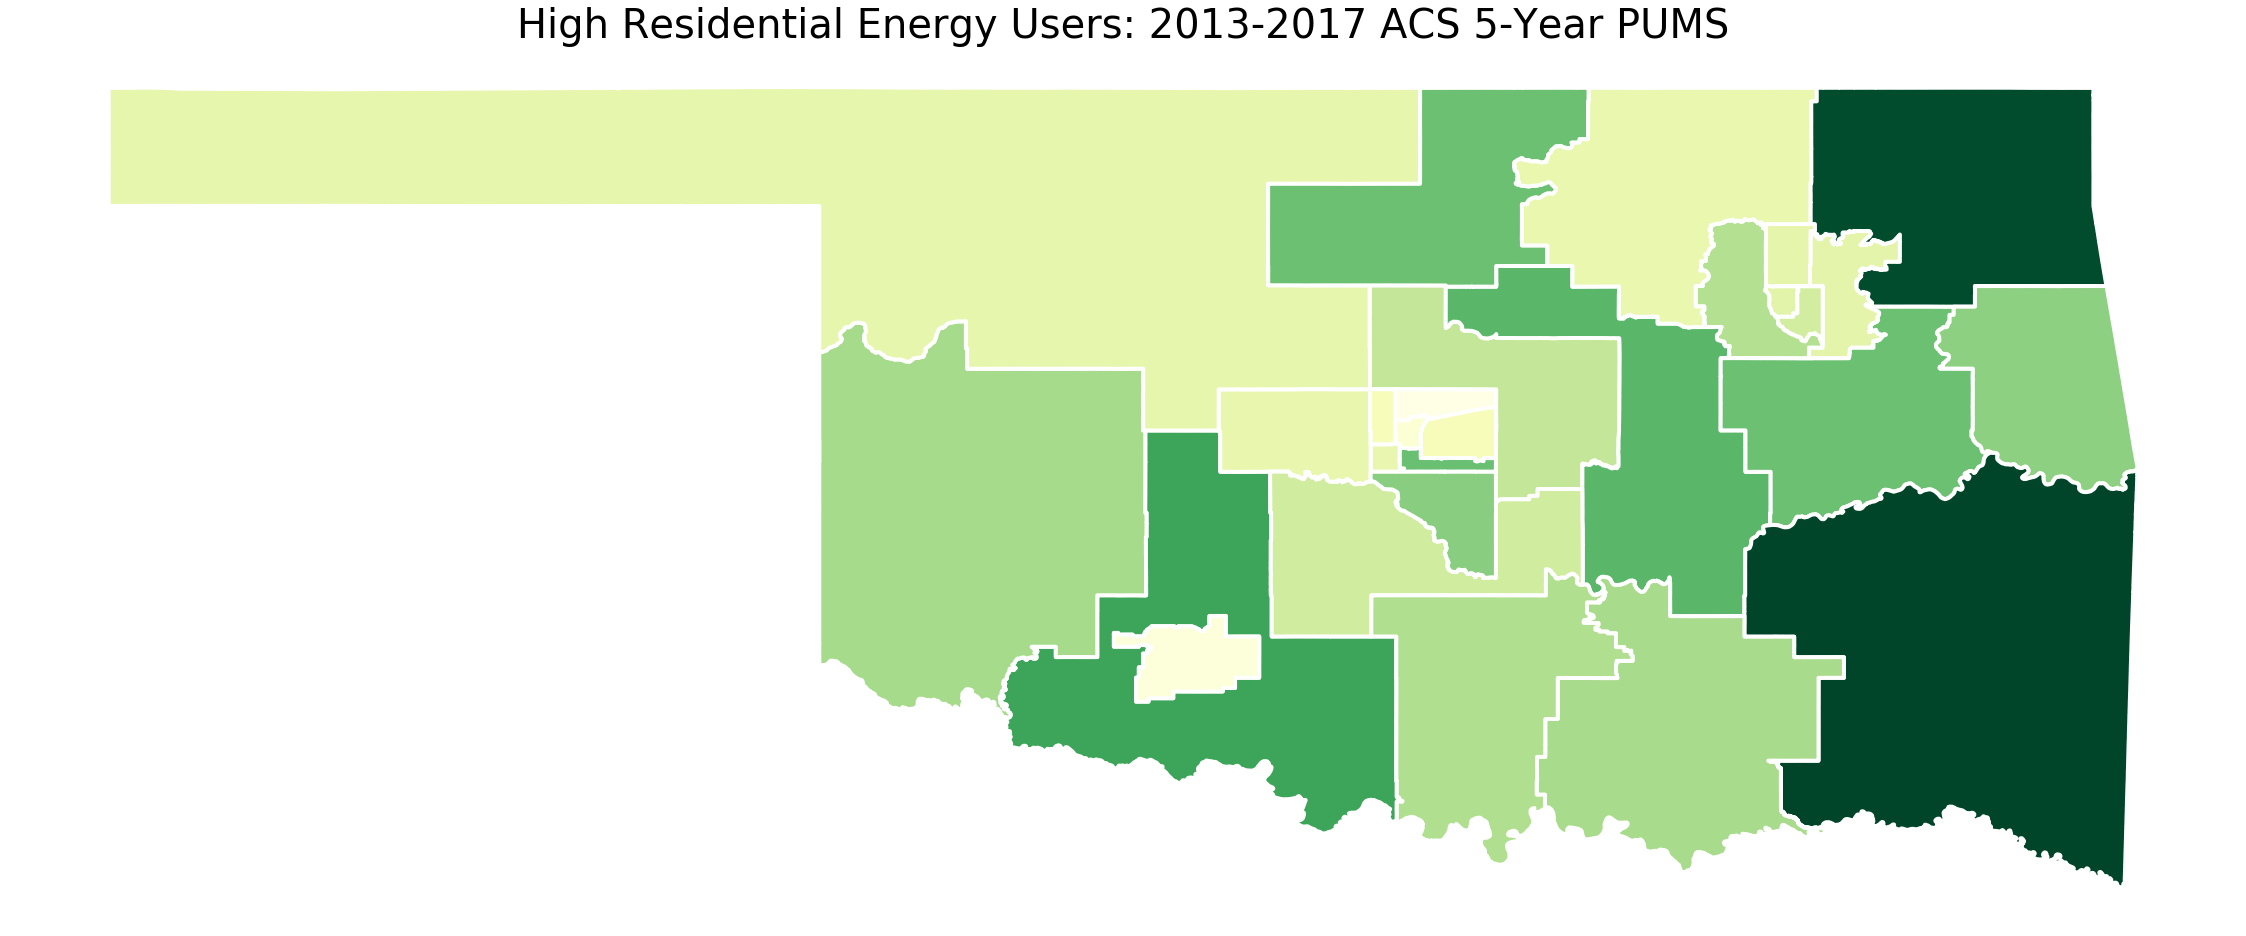

In [26]:
fig, ax = plt.subplots(figsize=(40, 40), subplot_kw={'aspect':'equal'})

dfin.plot(column='estimate',
          cmap='YlGn',
          legend=False,
          ax=ax,
          edgecolor='white',
          k=56,
          linewidth=4)

ax.set_axis_off()

plt.title("High Residential Energy Users: 2013-2017 ACS 5-Year PUMS", fontsize=40)

plt.show()

In [27]:
dfin[['PUMA','NAMELSAD10','estimate','variance','standard-error','moe-90','ci-90-lower','ci-90-upper']].sort_values(by=['estimate'], ascending=False).to_csv("C://Users/zcole/my_projects/wx_maps/outputs/acs-pums_13-17/hreu_acs-pums-40_13-17_FIN2.csv")